# Chapter 11

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
def logit(z):
    return 1/(1+np.exp(-z))

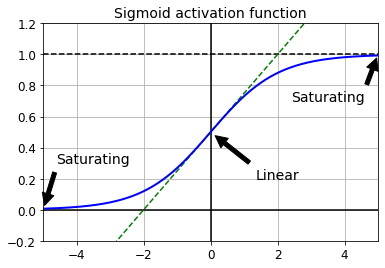

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

# save_fig("sigmoid_saturation_plot")
plt.show()

## Xavier and He initialization

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

In [6]:
he_avg_init = keras.initializers.VarianceScaling(scale=2, mode='fan_avg', distribution = 'uniform')
keras.layers.Dense(10, activation='sigmoid', kernel_initializer=he_avg_init)

## Not saturating activation functions

### Leaky relu

In [7]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

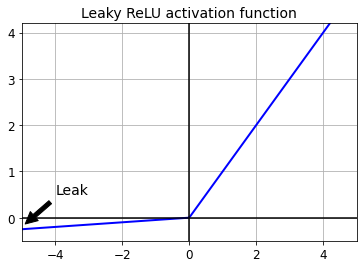

In [8]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

# save_fig("leaky_relu_plot")
plt.show()

In [9]:
[m for m in dir(keras.activations) if not m.startswith('_')]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [10]:
[m for m in dir(keras.layers) if 'relu' in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

Train neural network on Fashion MNIST with LeakyReLU layer

In [11]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full/255.0
X_test = X_test/255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, 
                    epochs=10,
                    validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 2s 977us/step - loss: 0.7955 - accuracy: 0.7361 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 2s 968us/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7900
Epoch 4/10
1719/1719 [==============================] - 2s 975us/step - loss: 0.6217 - accuracy: 0.7945 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8200
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 2s 956us/step - loss: 0.5338 - accuracy: 0.8224 - val_loss: 0.5156 - val_a

Now PRelu

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation='softmax')
])

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, 
                    epochs=10,
                    validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8197 - accuracy: 0.7355 - val_loss: 0.7305 - val_accuracy: 0.7630
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6965 - accuracy: 0.7694 - val_loss: 0.6564 - val_accuracy: 0.7882
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6330 - accuracy: 0.7909 - val_loss: 0.6003 - val_accuracy: 0.8048
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5917 - accuracy: 0.8056 - val_loss: 0.5656 - val_accuracy: 0.8182
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5618 - accuracy: 0.8133 - val_loss: 0.5406 - val_accuracy: 0.8236
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5390 - accuracy: 0.8205 - val_loss: 0.5196 - val_accuracy:

### ELU

In [18]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

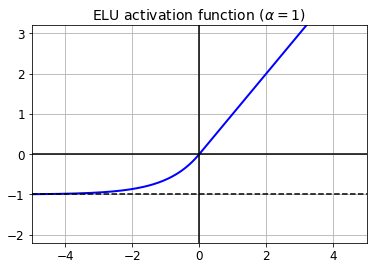

In [19]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

# save_fig("elu_plot")
plt.show()

But if alpha is close to zero?

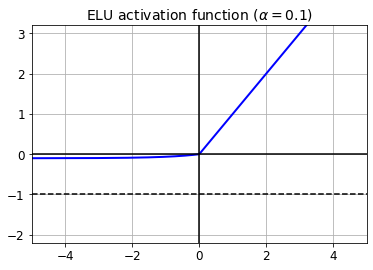

In [20]:
plt.plot(z, elu(z, alpha=0.1), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=0.1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

# save_fig("elu_alpha0_plot")
plt.show()

### SELU

In [21]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * \
(2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [22]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

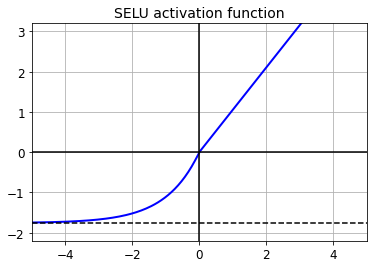

In [23]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

# save_fig("selu_plot")
plt.show()

By default, the SELU hyperparameters (scale and alpha) are tuned in such a way that the mean output of each neuron remains close to 0, and the standard deviation remains close to 1 (assuming the inputs are standardized with mean 0 and standard deviation 1 too). Using this activation function, even a 1,000 layer deep neural network preserves roughly mean 0 and standard deviation 1 across all layers, avoiding the exploding/vanishing gradients problem:

In [24]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [25]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal") # weights must be initialized with LeCun normal initialization

In [26]:
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [29]:
# Scale data
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [30]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 14s 8ms/step - loss: 1.3713 - accuracy: 0.4687 - val_loss: 0.9437 - val_accuracy: 0.6360
Epoch 2/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.8343 - accuracy: 0.6928 - val_loss: 0.9943 - val_accuracy: 0.6464
Epoch 3/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.6983 - accuracy: 0.7458 - val_loss: 0.6822 - val_accuracy: 0.7624
Epoch 4/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.6252 - accuracy: 0.7700 - val_loss: 0.6009 - val_accuracy: 0.7784
Epoch 5/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5783 - accuracy: 0.7847 - val_loss: 0.5523 - val_accuracy: 0.7996


In [31]:
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [34]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 13s 8ms/step - loss: 1.8022 - accuracy: 0.2636 - val_loss: 1.3792 - val_accuracy: 0.3922
Epoch 2/5
1719/1719 [==============================] - 12s 7ms/step - loss: 1.1706 - accuracy: 0.5016 - val_loss: 0.9433 - val_accuracy: 0.5974
Epoch 3/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.9561 - accuracy: 0.6143 - val_loss: 0.8590 - val_accuracy: 0.6692
Epoch 4/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8617 - accuracy: 0.6546 - val_loss: 1.0677 - val_accuracy: 0.4918
Epoch 5/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8084 - accuracy: 0.6716 - val_loss: 0.7111 - val_accuracy: 0.7136


## Batch normalization

In [35]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_211 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_212 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_213 (Dense)            (None, 10)               

In [37]:
[(var.name,var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [38]:
model.layers[1].updates

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


[]

In [39]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])

In [40]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.9129 - accuracy: 0.6901 - val_loss: 0.6165 - val_accuracy: 0.7976
Epoch 2/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6161 - accuracy: 0.7878 - val_loss: 0.5475 - val_accuracy: 0.8240
Epoch 3/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5597 - accuracy: 0.8054 - val_loss: 0.5389 - val_accuracy: 0.8344
Epoch 4/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5218 - accuracy: 0.8189 - val_loss: 0.5036 - val_accuracy: 0.8420
Epoch 5/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4983 - accuracy: 0.8259 - val_loss: 0.4610 - val_accuracy: 0.8464


### Batch normalization before activation
No need to add bias since BN includes one offset parameter per input\
Remove activation from hidden layer and add after BN

In [41]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [42]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [43]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.0317 - accuracy: 0.6756 - val_loss: 0.6767 - val_accuracy: 0.7812
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6791 - accuracy: 0.7793 - val_loss: 0.5566 - val_accuracy: 0.8180
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5960 - accuracy: 0.8037 - val_loss: 0.5007 - val_accuracy: 0.8360
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5447 - accuracy: 0.8192 - val_loss: 0.4666 - val_accuracy: 0.8448
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5109 - accuracy: 0.8279 - val_loss: 0.4434 - val_accuracy: 0.8536
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4898 - accuracy: 0.8339 - val_loss: 0.4263 - val_accuracy: 0.8548
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4712 - accuracy: 0.8397 - val_loss: 0.4131 - val_accuracy:

## Gradient clipping

In [44]:
# NOT RUN
# optimizer = keras.optimizers.SGD(clipvalue=1.0)
# optimizer = keras.optimizers.SGD(clipnorm=1.0)

## Reusing Pretrained Layers

### Reusing a Keras model

Split the fashion MNIST training set in two:

* X_train_A: all images of all items except for sandals and shirts (classes 5 and 6).
* X_train_B: a much smaller training set of just the first 200 images of sandals or shirts.

The validation set and the test set are also split this way, but without restricting the number of images.

* Train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). 
* Hope to transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts). 
* Since using Dense layers, only patterns that occur at the same location can be reused 

In [45]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [46]:
X_train_A.shape

(43986, 28, 28)

In [47]:
X_train_B.shape

(200, 28, 28)

In [48]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [49]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [50]:
tf.random.set_seed(42)
np.random.seed(42)

In [51]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [52]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [53]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.5926 - accuracy: 0.8104 - val_loss: 0.3896 - val_accuracy: 0.8662
Epoch 2/20
1375/1375 [==============================] - 3s 3ms/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3289 - val_accuracy: 0.8827
Epoch 3/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3170 - accuracy: 0.8895 - val_loss: 0.3014 - val_accuracy: 0.8979
Epoch 4/20
1375/1375 [==============================] - 1s 1ms/step - loss: 0.2973 - accuracy: 0.8973 - val_loss: 0.2894 - val_accuracy: 0.9026
Epoch 5/20
1375/1375 [==============================] - 1s 1ms/step - loss: 0.2835 - accuracy: 0.9021 - val_loss: 0.2774 - val_accuracy: 0.9063
Epoch 6/20
1375/1375 [==============================] - 1s 1ms/step - loss: 0.2730 - accuracy: 0.9061 - val_loss: 0.2733 - val_accuracy: 0.9071
Epoch 7/20
1375/1375 [==============================] - 1s 1ms/step - loss: 0.2641 - accuracy: 0.9092 - val_loss: 0.2717 - val_accuracy:

In [54]:
model_A.save("my_model_A.h5")

In [55]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [56]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [57]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 22ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 6ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 6ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 6ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 6ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 6ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 6ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [=================

In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_214 (Dense)            (None, 300)               235200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_215 (Dense)            (None, 100)               30000     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)              

In [59]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [60]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [61]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [62]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 65ms/step - loss: 0.5771 - accuracy: 0.6550 - val_loss: 0.5813 - val_accuracy: 0.6339
Epoch 2/4
7/7 [==============================] - 0s 6ms/step - loss: 0.5407 - accuracy: 0.6800 - val_loss: 0.5440 - val_accuracy: 0.6826
Epoch 3/4
7/7 [==============================] - 0s 6ms/step - loss: 0.5040 - accuracy: 0.7350 - val_loss: 0.5120 - val_accuracy: 0.7120
Epoch 4/4
7/7 [==============================] - 0s 6ms/step - loss: 0.4726 - accuracy: 0.7450 - val_loss: 0.4835 - val_accuracy: 0.7343
Epoch 1/16
7/7 [==============================] - 0s 23ms/step - loss: 0.3947 - accuracy: 0.8150 - val_loss: 0.3447 - val_accuracy: 0.8651
Epoch 2/16
7/7 [==============================] - 0s 6ms/step - loss: 0.2790 - accuracy: 0.9350 - val_loss: 0.2596 - val_accuracy: 0.9290
Epoch 3/16
7/7 [==============================] - 0s 6ms/step - loss: 0.2080 - accuracy: 0.9650 - val_loss: 0.2106 - val_accuracy: 0.9554
Epoch 4/16
7/7 [====================

In [63]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 889us/step - loss: 0.0682 - accuracy: 0.9935


[0.06824154406785965, 0.9934999942779541]

In [64]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 825us/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

## Faster optimizers

In [65]:
# Momentum optimization
# optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)
# Nesterov Accelerated Gradient
# optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
# AdaGrad
# optimizer = keras.optimizers.Adagrad(lr=0.001)
# RMSProp
# optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)
# Adam Optimization
# optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
# Adamax Optimization
# optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)
# Nadam Optimization
# optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Learning rate scheduling

### Power scheduling

lr = lr0 / (1 + t/s)**c\
Where t is iteration number, s is step parameter, c is power parameter\
Hence learning rate declines by 1/2 at first t steps, 1/3 at second t steps, etc..

* Keras: c = 1, s = 1/decay

In [66]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [67]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [68]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4855 - accuracy: 0.8303 - val_loss: 0.4029 - val_accuracy: 0.8604
Epoch 2/25
1719/1719 [==============================] - 2s 989us/step - loss: 0.3781 - accuracy: 0.8658 - val_loss: 0.3716 - val_accuracy: 0.8722
Epoch 3/25
1719/1719 [==============================] - 2s 977us/step - loss: 0.3458 - accuracy: 0.8767 - val_loss: 0.3746 - val_accuracy: 0.8748
Epoch 4/25
1719/1719 [==============================] - 2s 987us/step - loss: 0.3250 - accuracy: 0.8828 - val_loss: 0.3499 - val_accuracy: 0.8804
Epoch 5/25
1719/1719 [==============================] - 2s 966us/step - loss: 0.3101 - accuracy: 0.8892 - val_loss: 0.3450 - val_accuracy: 0.8792
Epoch 6/25
1719/1719 [==============================] - 2s 970us/step - loss: 0.2966 - accuracy: 0.8935 - val_loss: 0.3412 - val_accuracy: 0.8834
Epoch 7/25
1719/1719 [==============================] - 2s 977us/step - loss: 0.2867 - accuracy: 0.8974 - val_loss: 0.3356 - v

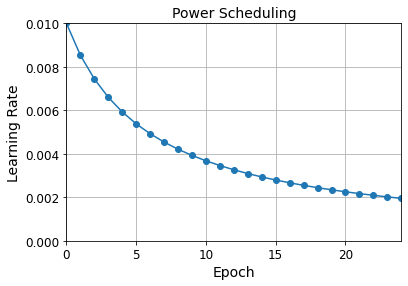

In [69]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Exponential scheduling

lr = lr0 * 0.1**(epoch/s)

In [70]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [71]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [72]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [73]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8657 - accuracy: 0.7539 - val_loss: 1.0818 - val_accuracy: 0.7260
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7556 - accuracy: 0.7743 - val_loss: 0.7925 - val_accuracy: 0.7836
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6224 - accuracy: 0.8121 - val_loss: 0.6133 - val_accuracy: 0.8254
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5545 - accuracy: 0.8291 - val_loss: 0.5327 - val_accuracy: 0.8456
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5114 - accuracy: 0.8423 - val_loss: 0.6386 - val_accuracy: 0.8484
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4629 - accuracy: 0.8572 - val_loss: 0.4995 - val_accuracy: 0.8524
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4358 - accuracy: 0.8654 - val_loss: 0.4694 - val_accuracy:

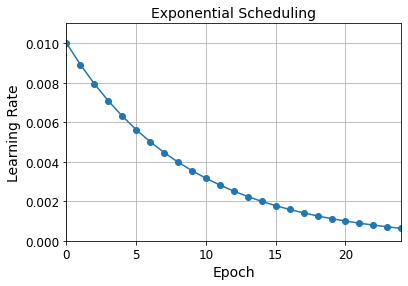

In [74]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

Schedule function taking current lelarning rate as second argument

In [83]:
def exponential_decay_fn(epoch,lr):
    return lr * 0.1**(1/20)

To update learning rate at each iteration rathter htna at each epocch, write own callback class

In [87]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000): 
        super().__init__()
        self.s = s
        
    def on_batch_begin(self, batch, logs=None):
        # 'batch' argument reset at each epoch
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1/s))
        
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)
        
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax'),
])

lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
n_epochs = 25

s = 20 * len(X_train) // 232 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data = (X_valid_scaled, y_valid),
                   callbacks = [exp_decay])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5937 - accuracy: 0.7991 - val_loss: 0.4436 - val_accuracy: 0.8492
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3766 - accuracy: 0.8645 - val_loss: 0.3730 - val_accuracy: 0.8652
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3022 - accuracy: 0.8880 - val_loss: 0.3377 - val_accuracy: 0.8812
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2566 - accuracy: 0.9038 - val_loss: 0.3143 - val_accuracy: 0.8874
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2313 - accuracy: 0.9135 - val_loss: 0.3130 - val_accuracy: 0.8912
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2182 - accuracy: 0.9194 - val_loss: 0.3151 - val_accuracy: 0.8902
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2115 - accuracy: 0.9213 - val_loss: 0.3136 - val_accuracy:

In [88]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps/s)

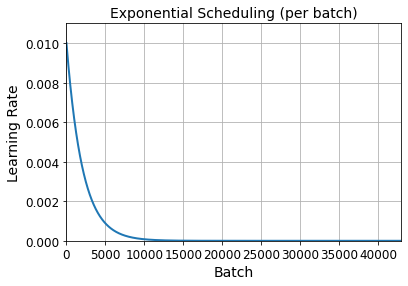

In [89]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel('Learning Rate')
plt.title('Exponential Scheduling (per batch)', fontsize=14)
plt.grid(True)
plt.show()

This does not match the graph in github: \
https://github.com/ageron/handson-ml2/blob/master/11_training_deep_neural_networks.ipynb

## Piecewise Constant Scheduling

In [92]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else: 
        return 0.001

In [93]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8389 - accuracy: 0.7595 - val_loss: 0.8581 - val_accuracy: 0.7770
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8232 - accuracy: 0.7580 - val_loss: 0.8816 - val_accuracy: 0.7006
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2098 - accuracy: 0.6132 - val_loss: 1.4052 - val_accuracy: 0.5500
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 1.1801 - accuracy: 0.6020 - val_loss: 1.1143 - val_accuracy: 0.6188
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 1.1464 - accuracy: 0.5994 - val_loss: 1.0693 - val_accuracy: 0.5816
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8927 - accuracy: 0.6517 - val_loss: 0.8722 - val_accuracy: 0.6684
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8210 - accuracy: 0.6684 - val_loss: 0.9101 - val_accuracy:

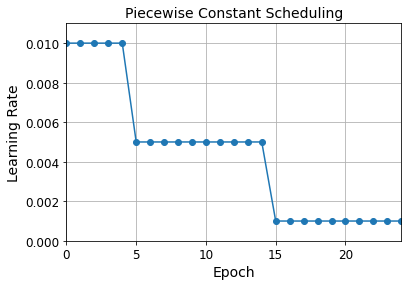

In [94]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## Performance scheduling

In [95]:
tf.random.set_seed(42)
np.random.seed(42)

In [103]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax'),
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
n_epochs=25
history=model.fit(X_train_scaled, y_train, epochs=n_epochs,
                 validation_data=(X_valid_scaled, y_valid),
                 callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5952 - accuracy: 0.8053 - val_loss: 0.4914 - val_accuracy: 0.8494
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4934 - accuracy: 0.8401 - val_loss: 0.5455 - val_accuracy: 0.8454
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5193 - accuracy: 0.8409 - val_loss: 0.5187 - val_accuracy: 0.8536
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5134 - accuracy: 0.8460 - val_loss: 0.4858 - val_accuracy: 0.8492
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5283 - accuracy: 0.8481 - val_loss: 0.4563 - val_accuracy: 0.8624
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5054 - accuracy: 0.8547 - val_loss: 0.4857 - val_accuracy: 0.8628
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5305 - accuracy: 0.8522 - val_loss: 0.6226 - val_accuracy:

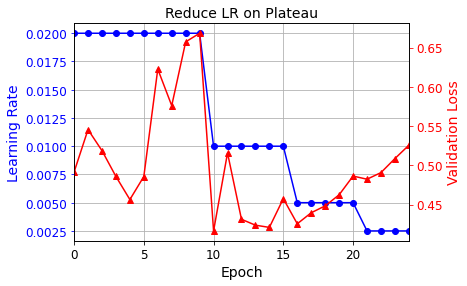

In [104]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### tf.keras schedulers

In [105]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4917 - accuracy: 0.8278 - val_loss: 0.4021 - val_accuracy: 0.8600
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3822 - accuracy: 0.8650 - val_loss: 0.3712 - val_accuracy: 0.8716
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3484 - accuracy: 0.8763 - val_loss: 0.3698 - val_accuracy: 0.8692
Epoch 4/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3270 - accuracy: 0.8842 - val_loss: 0.3463 - val_accuracy: 0.8798
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3110 - accuracy: 0.8897 - val_loss: 0.3403 - val_accuracy: 0.8786
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2969 - accuracy: 0.8948 - val_loss: 0.3388 - val_accuracy: 0.8832
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2865 - accuracy: 0.8982 - val_loss: 0.3330 - val_accuracy:

Piecewise constant scheduling:

In [106]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

## 1Cycle scheduling

In [107]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [108]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.3912       


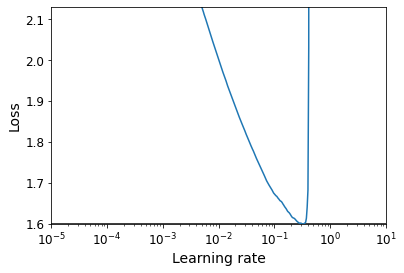

In [109]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [110]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [111]:
n_epochs = 25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 1s 2ms/step - loss: 0.6572 - accuracy: 0.7740 - val_loss: 0.4872 - val_accuracy: 0.8338
Epoch 2/25
430/430 [==============================] - 1s 2ms/step - loss: 0.4580 - accuracy: 0.8397 - val_loss: 0.4275 - val_accuracy: 0.8520
Epoch 3/25
430/430 [==============================] - 1s 2ms/step - loss: 0.4121 - accuracy: 0.8548 - val_loss: 0.4116 - val_accuracy: 0.8590
Epoch 4/25
430/430 [==============================] - 1s 2ms/step - loss: 0.3837 - accuracy: 0.8640 - val_loss: 0.3869 - val_accuracy: 0.8684
Epoch 5/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3639 - accuracy: 0.8717 - val_loss: 0.3769 - val_accuracy: 0.8682
Epoch 6/25
430/430 [==============================] - 2s 6ms/step - loss: 0.3456 - accuracy: 0.8775 - val_loss: 0.3745 - val_accuracy: 0.8716
Epoch 7/25
430/430 [==============================] - 3s 8ms/step - loss: 0.3330 - accuracy: 0.8812 - val_loss: 0.3635 - val_accuracy: 0.8722
Epoch 

## Avoiding Overfitting through Regularization

### $l_{1}$ and $l_{2}$ regularization

In [113]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer='he_normal',
                          kernel_regularizer=keras.regularizers.l2(0.01))

# or l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [116]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal',
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal',
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation='softmax',
                       kernel_regularizer=keras.regularizers.l2(0.01))
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 7s 4ms/step - loss: 1.9372 - accuracy: 0.8107 - val_loss: 0.7073 - val_accuracy: 0.8356
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7113 - accuracy: 0.8294 - val_loss: 0.6779 - val_accuracy: 0.8428


In [118]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation='elu',
                           kernel_initializer='he_normal',
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy']),
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 3ms/step - loss: 1.6313 - accuracy: 0.8113 - val_loss: 0.7218 - val_accuracy: 0.8310
Epoch 2/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7187 - accuracy: 0.8273 - val_loss: 0.6826 - val_accuracy: 0.8382


## Dropout

In [120]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5838 - accuracy: 0.7997 - val_loss: 0.3730 - val_accuracy: 0.8644
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4209 - accuracy: 0.8444 - val_loss: 0.3397 - val_accuracy: 0.8714


### Alpha Dropout

In [121]:
tf.random.set_seed(42)
np.random.seed(42)

In [122]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6653 - accuracy: 0.7592 - val_loss: 0.5920 - val_accuracy: 0.8424
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5607 - accuracy: 0.7935 - val_loss: 0.5573 - val_accuracy: 0.8402
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5284 - accuracy: 0.8055 - val_loss: 0.4852 - val_accuracy: 0.8586
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5072 - accuracy: 0.8121 - val_loss: 0.4595 - val_accuracy: 0.8608
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4922 - accuracy: 0.8183 - val_loss: 0.4695 - val_accuracy: 0.8552
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4862 - accuracy: 0.8190 - val_loss: 0.4752 - val_accuracy: 0.8590
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4718 - accuracy: 0.8247 - val_loss: 0.4689 - val_accuracy:

In [123]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 709us/step - loss: 0.4461 - accuracy: 0.8699


[0.4460560977458954, 0.8698999881744385]

In [124]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 1s 679us/step - loss: 0.3303 - accuracy: 0.8898


[0.33031073212623596, 0.8897818326950073]

In [125]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 3s 2ms/step - loss: 0.4161 - accuracy: 0.8454


## MC Dropout

In [126]:
tf.random.set_seed(42)
np.random.seed(42)

In [128]:
y_probas = np.stack([model(X_test_scaled, training=True)
                    for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [129]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Model is certain that belongs to class 9: ankle boot.\
Compare to predictions made when dropout activated.

In [130]:
np.round(y_probas[:, :1],2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.09, 0.  , 0.77]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.81, 0.  , 0.18]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.46, 0.  , 0.  , 0.  , 0.54]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.22, 0.  , 0.66]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.09, 0.  , 0.78]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.51, 0.  , 0.48]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.38, 0.  , 0.22, 0.  , 0.4 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.4 , 0.  , 0.59]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.75, 0.  , 0.02, 0.  , 0.23]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.08, 0.  , 0.89]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.53, 0.  , 0.  , 0.  , 0.47]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.8 , 0.  , 0.05, 0.  , 0.15]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.02, 0.  , 0

When activate dropout, model not as sure. Prefers class 9 mostly, but also chooses others.\
Average over first dimension get the following...

In [131]:
np.round(y_proba[:1],2)

array([[0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0.1, 0. , 0.7]], dtype=float32)

70% chance its class 9. Look at stdev of proba of estimates

In [132]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.16, 0.  , 0.27]],
      dtype=float32)

Lots of variance in prob estimates.

In [133]:
y_pred = np.argmax(y_proba,axis=1)

In [135]:
accuracy = np.sum(y_pred == y_test)/len(y_test)
accuracy

0.8665

In [136]:
np.mean(y_pred == y_test)

0.8665

Accuracy boost: 0.8665 from 0.8454

If model contains other special layers -- e.g., BatchNormalization -- replace Dropout layers with MCDropout class.

In [140]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)
    
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self,inputs):
        return super().call(inputs, training=True)

In [141]:
tf.random.set_seed(42)
np.random.seed(42)

In [142]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [143]:
mc_model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_29 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_284 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_285 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_286 (Dense)            (None, 10)              

In [144]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [145]:
mc_model.set_weights(model.get_weights())

Now can use model with MC Dropout.

In [147]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.21, 0.  , 0.16, 0.  , 0.63]],
      dtype=float32)

## Max-Norm Regularization

In [148]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [149]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4733 - accuracy: 0.8336 - val_loss: 0.3812 - val_accuracy: 0.8620
Epoch 2/2
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3558 - accuracy: 0.8701 - val_loss: 0.3756 - val_accuracy: 0.8702


max_norm() defualts to axis=0. Dense layer shape = [# of inputs, # of neurons]\
Using axis=0 means max-norm constrint applied indepndently to each neuron's weight vector.\
For convolutional layers set max_norm() to axis = [0, 1, 2].